# Data Exploration and Preprocessing

In [89]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [90]:
# loading the dataset
df = pd.read_csv('Supermarket_CustomerMembers.csv')

In [91]:
# exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [92]:
# exploring the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [93]:
# checking for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

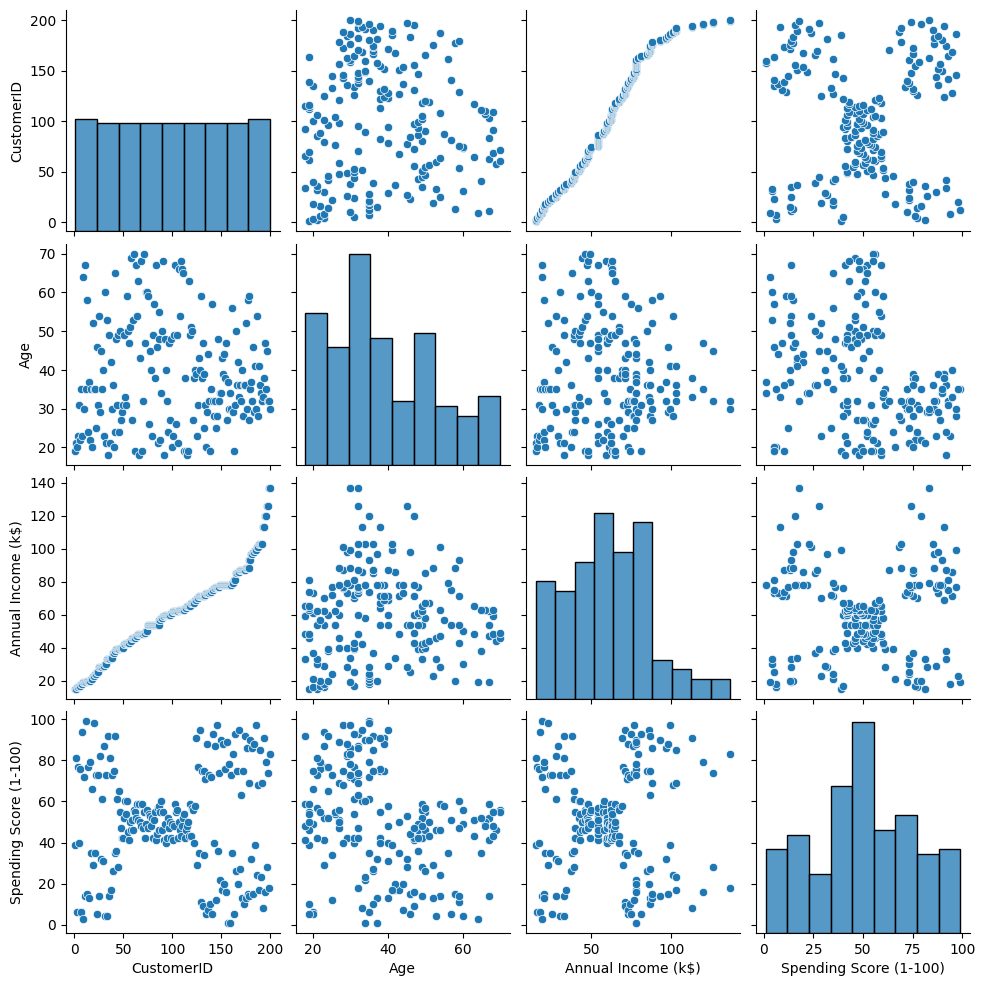

In [94]:
# visualizing the distribution of numerical features
sns.pairplot(df)
plt.show()

In [95]:
# normalizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Data Analysis and Feature Engineering

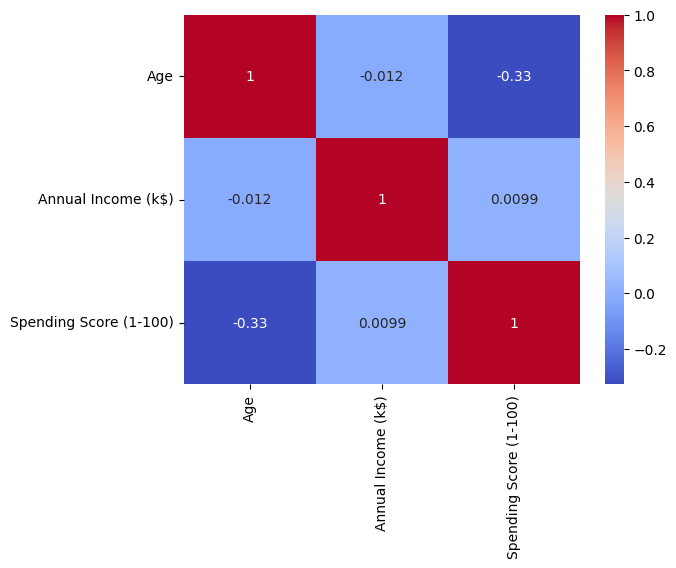

In [96]:
# exploring relationships between features
correlation_matrix = df_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

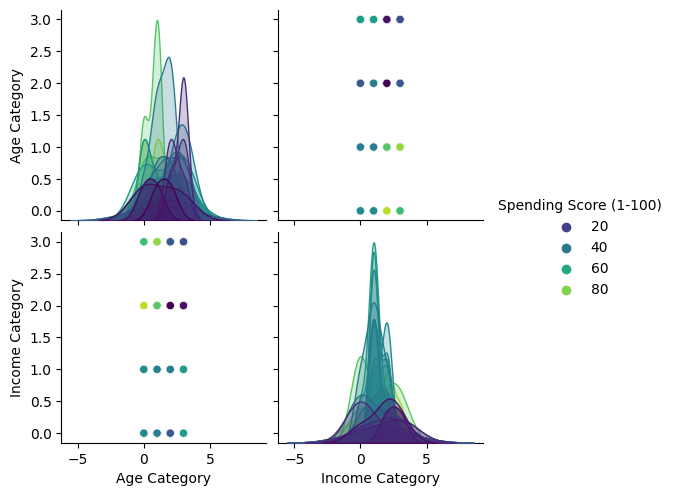

In [97]:
# feature engineering

# specifying the number of bins
num_bins = 4

# creating bins for 'Age'
df['Age Category'], age_bins = pd.qcut(df['Age'], q=num_bins, labels=False, retbins=True)

# creating bins for 'Annual Income (k$)'
df['Income Category'], income_bins = pd.qcut(df['Annual Income (k$)'], q=num_bins, labels=False, retbins=True)

# converting categorical variables to numeric
df['Age Category'] = df['Age Category'].astype('category').cat.codes
df['Income Category'] = df['Income Category'].astype('category').cat.codes

# exploring relationships between the new features and the spending score
sns.pairplot(df, vars=['Age Category', 'Income Category'], hue='Spending Score (1-100)', palette='viridis')
plt.show()

In [98]:
# determining the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

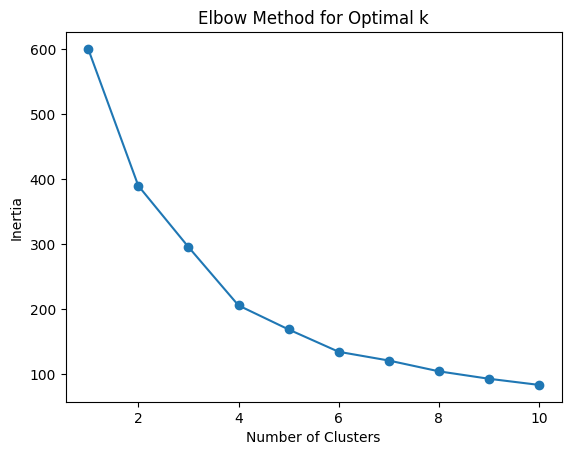

In [99]:
# plotting the Elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [100]:
# based on the Elbow method, choosing the optimal number of clusters
k = 5

# Model Development

In [101]:
# building the KMeans model
kmeans_model = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans_model.fit_predict(df_scaled)

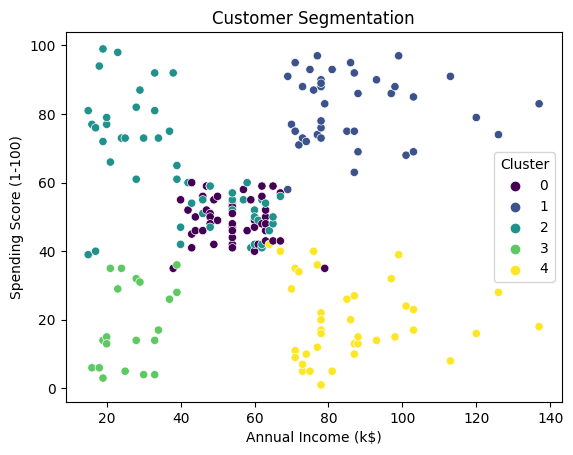

In [102]:
# visualizing the clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation')
plt.show()

# Model Evaluation

In [103]:
# evaluating the model using silhouette score
silhouette_avg = silhouette_score(df_scaled, kmeans_model.labels_)
f'Silhouette Score: {silhouette_avg}'

'Silhouette Score: 0.41664341513732767'